In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [4]:
# adjust the path accordingly
employee = pd.read_csv('/content/drive/MyDrive/Dibimbing/Day 2 - Data Science Careers and Portofolio/Employee.csv')

#  Preliminary Look and Data Cleansing

## Sample of data

In [5]:
# Showing top 5 rows of the data
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [6]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
employee.sample(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1202,Masters,2017,New Delhi,3,24,Female,No,2,0
3783,Bachelors,2014,Bangalore,3,34,Male,No,3,0
1704,Bachelors,2012,Bangalore,3,26,Male,No,4,0
3968,Bachelors,2017,Bangalore,3,39,Male,No,5,0
920,PHD,2018,New Delhi,3,24,Female,No,2,1


Observations:
1. `EverBenched` column seems to contain two distinct values (Yes or No), but will confirm later
2. `Gender` column seems to contain two distinct values (Male or Female), but will confirm later
2. `LeaveOrNot` is apparently also binary (0,1)
3. No obvious defect on the data (column name vs its entries), all looks good

## General Information & Missing Values

In [7]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Observation:
1. Data contains 9 columns with 4563 rows
2. All dtypes seem OK (appropriate), given the corresponding column name

In [8]:
# number of missing values per column
employee.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

No missing values

## Duplicated data check

In [9]:
# number of duplicated data
employee.duplicated().sum()

1889

There are 1889 duplicated rows; will be dropped later.

### Drop duplicated rows

In [10]:
duplicate = employee.duplicated().sum()
employee = employee.drop_duplicates()

print('No. of duplicate records :',duplicate)
print('Shape after dropping duplicate records :',employee.shape)

No. of duplicate records : 1889
Shape after dropping duplicate records : (2764, 9)


In [11]:
# sanity check
employee.duplicated().sum()

0

Duplicated rows have gone

# Data understanding

## Statistical summary

In [12]:
# group column names based on type

categoricals = ['Education', 'City', 'Gender', 'EverBenched']

numericals = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain','LeaveOrNot']

In [13]:
# numerical statistical sumary
employee[numericals].describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Observation:
* Overall, the minimum and maximum values make sense for each column
* `LeaveOrNot` column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity.
* `JoiningYear`, `PaymentTier`, and `ExperienceInCurrentDomain` are discrete values with not that many unique values, no need to conclude its simmetricity either.
* Mean ~ 50% (Median) in `Age` column, indicating somewhat a positively skewed

From basic statistics
- Mininmum Age of the employee is "22".
- Maximum Age of the employee is "41".
- Mininmum Experience of the employee is "0".
- Maximum Experience of the employee is "7".
- Minimum joining year of the employee is "2012".
- Maxinmum joining year of the employee is "2018".

In [14]:
# describe method on categorical data
employee[categoricals].describe()

,Education,City,Gender,EverBenched
count,2764,2764,2764,2764
unique,3,3,2,2
top,Bachelors,Bangalore,Male,No
freq,1971,1171,1529,2403


In [15]:
# showing the precise value counts
for col in categoricals:
  print(f"Value counts of {col} column")
  print(employee[col].value_counts(), '\n')

Value counts of Education column
Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64 

Value counts of City column
Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64 

Value counts of Gender column
Male      1529
Female    1235
Name: Gender, dtype: int64 

Value counts of EverBenched column
No     2403
Yes     361
Name: EverBenched, dtype: int64 



# Univariate Analysis

## Boxplot to detect outliers

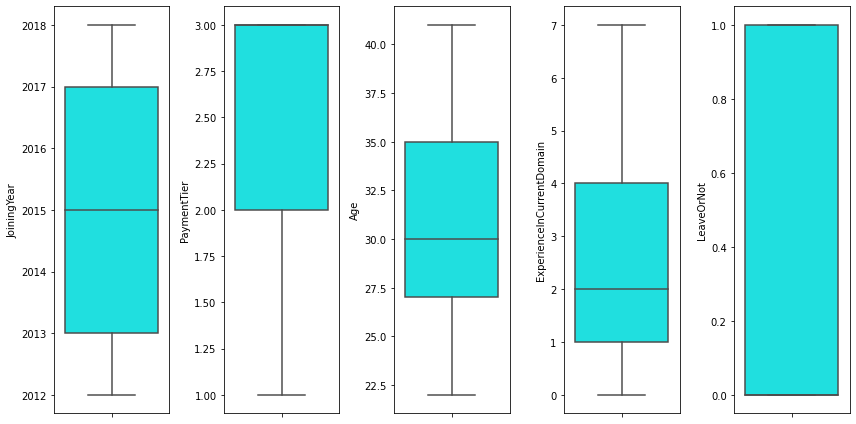

In [16]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=employee[features[i]], color='cyan')
    plt.tight_layout()

No outlier

## KDE plot for knowing the distribution form

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

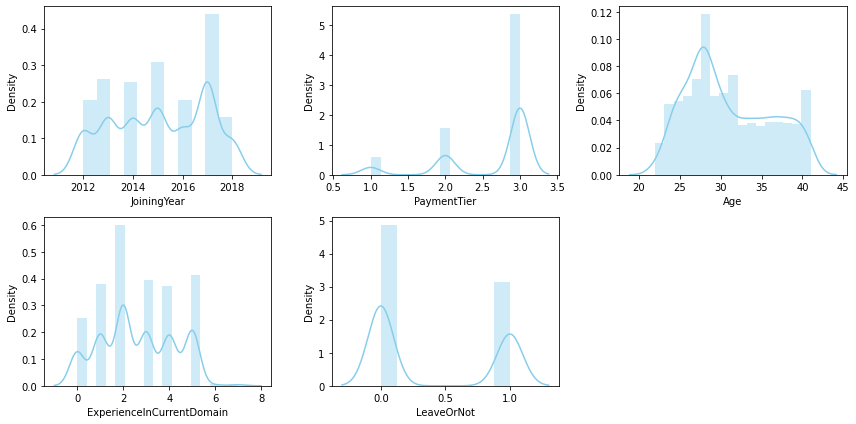

In [17]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=employee[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. We can ignore interpreting feature columns with limited discrete values such as `JoiningYear`, `PaymentTier`, and `ExperienceInCurrentDomain` 
2. The true continuous numeric features: `Age` is somewhat positively skewed.

# Bivariate Analysis

In [18]:
# remember the dataset
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


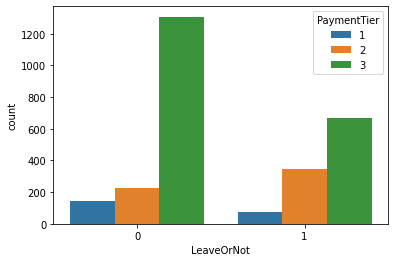

In [19]:
# PaymentTier affect LeaveOrNot?
sns.countplot(data=employee,
            x='LeaveOrNot',
            hue='PaymentTier')

1. Let's say `LeaveOrNot` = 1, means leave, and = 0, means otherwise
2. We can say that, employee whose `PaymentTier` are lowest more likely to leave.

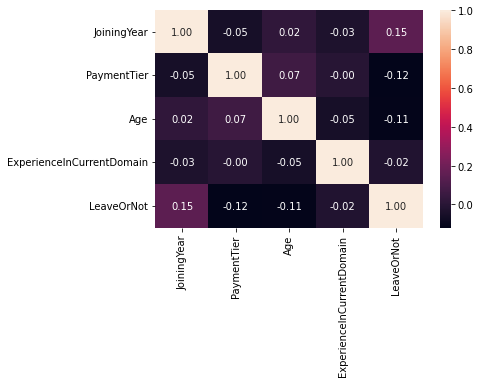

In [20]:
# correlation heatmap
correlation = employee.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation:
1. There is no redundant features in this dataset. Therefore, all columns is used
2. `JoiningYear` has highest correlation towards the `LeaveOrNot` (15%)

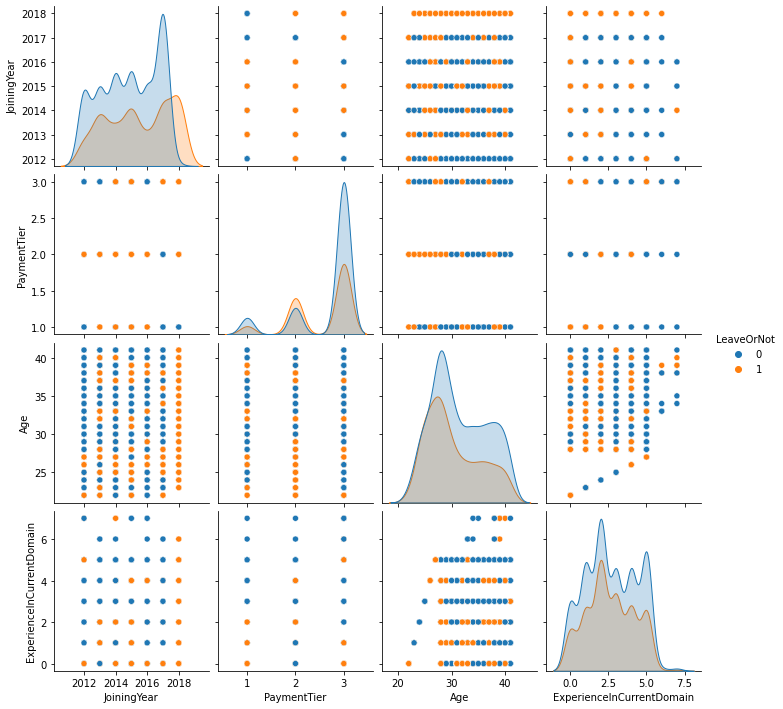

In [21]:
# pairplot of the data
sns.pairplot(employee, hue='LeaveOrNot')

## How Education affect LeaveOrNot

In [22]:
employee['Education'].value_counts()

Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64

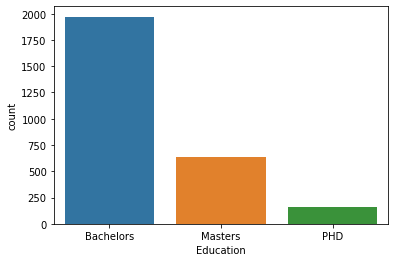

In [23]:
sns.countplot(x = 'Education',data = employee)
plt.show()

Most of the Employees completed bachelors degree

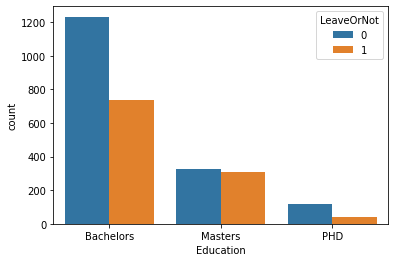

In [24]:
sns.countplot(data = employee ,x='Education',hue='LeaveOrNot')

Employees who have Bachelor's degrees are more likely to leave the company

## How JoiningYear affect LeaveOrNot

In [29]:
employee['JoiningYear'].value_counts()

2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: JoiningYear, dtype: int64

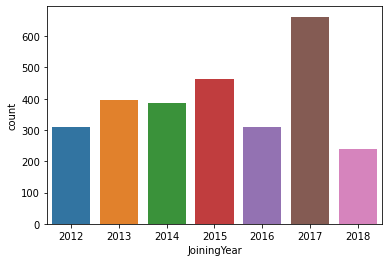

In [30]:
sns.countplot(x = 'JoiningYear',data = employee)
plt.show()

Most of the employees joined in the year 2017

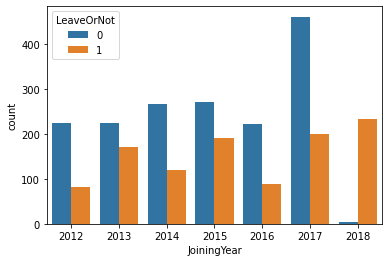

In [25]:
sns.countplot(data = employee ,x='JoiningYear',hue='LeaveOrNot')

Surprising ! Majority of the employees joined in 2018 (recently) have left the company

## How City affect LeaveOrNot

In [31]:
employee['City'].value_counts()

Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64

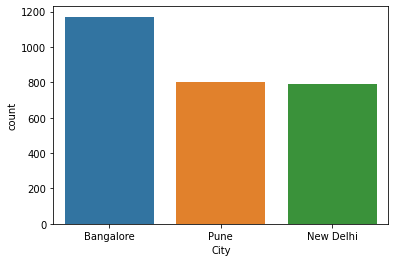

In [32]:
sns.countplot(x = 'City',data = employee)
plt.show()

Most of the Employees are from Bangalore

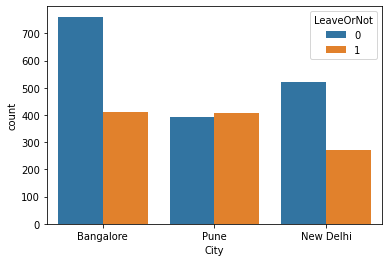

In [26]:
sns.countplot(data = employee ,x='City',hue='LeaveOrNot')

* Majority of the Employees residing / Working in Bangalore & New Delhi chose not to leave the company
* Maybe the work culture in Bangalore & New Delhi is pretty good when compared to Pune

## How PaymentTier affect LeaveOrNot

In [33]:
employee['PaymentTier'].value_counts()

3    1976
2     570
1     218
Name: PaymentTier, dtype: int64

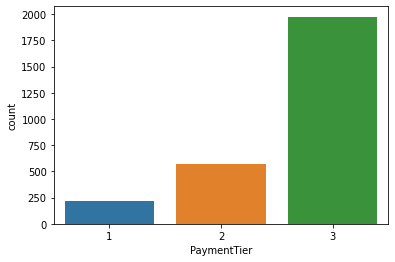

In [34]:
sns.countplot(x = 'PaymentTier',data = employee)
plt.show()

Most of the Employees belong to tier 3

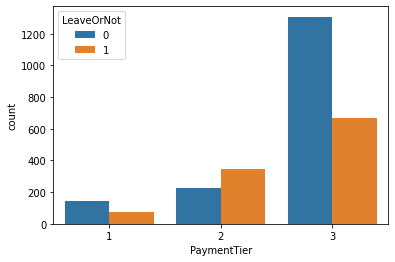

In [27]:
sns.countplot(data = employee ,x='PaymentTier',hue='LeaveOrNot')

## How Gender affect LeaveOrNot

In [35]:
employee['Gender'].value_counts()

Male      1529
Female    1235
Name: Gender, dtype: int64

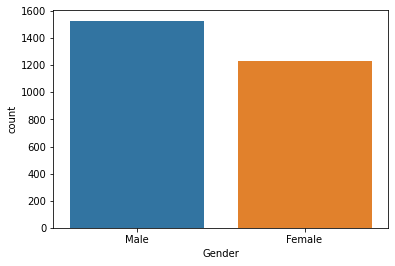

In [36]:
sns.countplot(x = 'Gender',data = employee)
plt.show()

Male Employees are more in number

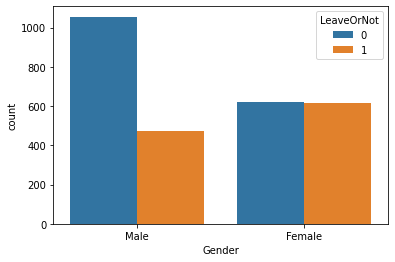

In [31]:
sns.countplot(data = employee ,x='Gender',hue='LeaveOrNot')

* Majority of the Male Employees choose not to leave the company
* While the ratio ( Leave / Not Leave ) of the Female Employees is almost equal to 1

## How EverBenched affect LeaveOrNot

In [37]:
employee['EverBenched'].value_counts()

No     2403
Yes     361
Name: EverBenched, dtype: int64

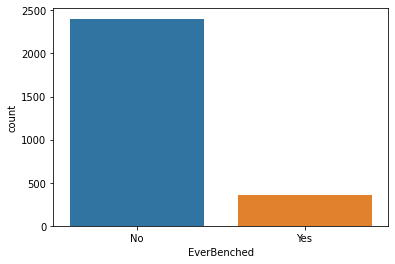

In [38]:
sns.countplot(x = 'EverBenched',data = employee)
plt.show()

Most of the Employees are not benched

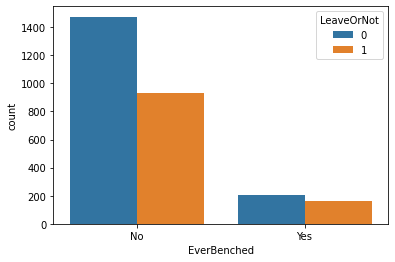

In [28]:
sns.countplot(data = employee ,x='EverBenched',hue='LeaveOrNot')

Its surprising that Employees being Benched on working projects have not left the company 

## How ExperienceInCurrentDomain affect LeaveOrNot

In [39]:
employee['ExperienceInCurrentDomain'].value_counts()

2    681
5    470
3    451
1    433
4    425
0    287
7      9
6      8
Name: ExperienceInCurrentDomain, dtype: int64

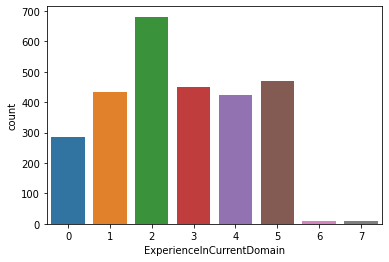

In [40]:
sns.countplot(x = 'ExperienceInCurrentDomain',data = employee)
plt.show()

Most of the Empolyees experience is between 0-2 years

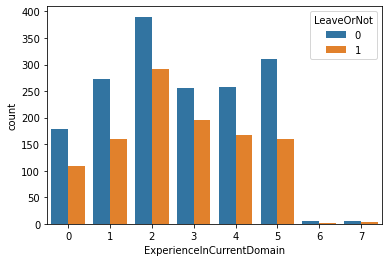

In [29]:
sns.countplot(data = employee ,x='ExperienceInCurrentDomain',hue='LeaveOrNot')

As the experience of Employees increases they chose to work/stay with company

## LeaveOrNot

In [41]:
employee['LeaveOrNot'].value_counts()

0    1676
1    1088
Name: LeaveOrNot, dtype: int64

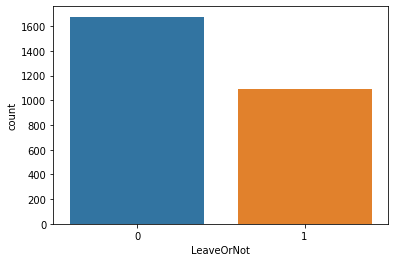

In [42]:
sns.countplot(x = 'LeaveOrNot',data = employee)
plt.show()

Most of the employess are not supposed to leave